<a href="https://colab.research.google.com/github/matthewsj17/Spotify-Data-Analysis-DSCI300-Project/blob/Jake/DSCI300_DataCleaning_SemesterProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook Directives/Requirements

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pre Processing

***Dataset*** Information (Taken From Kaggle)


**index** = *Unique Index for each track (can be ignored for analysis)*

**track_id** = *Spotify’s unique identifier for the track*

**artists** = *Name of the performing artist(s)*

**album_name** = *Title of the album the track belongs to*

**track_name** = *Title of the track*

**popularity** = *Popularity score on Spotify (0–100 scale)*

**duration_ms** = *Duration of the track in milliseconds*

**explicit** = *Indicates whether the track contains explicit content*

**danceability** = *How suitable the track is for dancing (0.0 to 1.0)*

**energy** = *Intensity and activity level of the track (0.0 to 1.0)*

**key** = *Musical key (0 = C, 1 = C♯/D♭, …, 11 = B)*

**loudness** = *Overall loudness of the track in decibels (dB)*

**mode** = *Modality (major = 1, minor = 0)*

**speechiness** = *Presence of spoken words in the track (0.0 to 1.0)*

**acousticness** = *Confidence measure of whether the track is acoustic (0.0 to 1.0)*

**instrumentalness** = *Predicts whether the track contains no vocals (0.0 to 1.0)*

**liveness** = *Presence of an audience in the recording (0.0 to 1.0)*

**valence** = *Musical positivity conveyed (0.0 = sad, 1.0 = happy)*

**tempo** = *Estimated tempo in beats per minute (BPM)*

**time_signature** = *Time signature of the track (e.g., 4 = 4/4)*

**track_genre** = *Assigned genre label for the track*


In [3]:
spotify_df = pd.read_csv('/content/drive/MyDrive/DSCI300/Project/monfaredSpotifyDataset.csv')

In [4]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [18]:
# Check for NaN values

spotify_df.isna().sum()



,0
index,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [19]:
# Since there are values, we isolate these to find what rows they're on.

nan_rows_any = spotify_df[spotify_df.isna().any(axis=1)]

nan_rows_any

# Its only one row, so we can either omit this from the data or try to identify the information from the track_id

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [6]:
# Identify Inconsistent Formatting

# Create a summary table of unique values for each column
unique_summary = pd.DataFrame({
    'Column': spotify_df.columns,
    'Num Unique Values': [spotify_df[col].nunique() for col in spotify_df],
    'Unique Values (sample)': [spotify_df[col].unique()[:10] for col in spotify_df.columns]  # show first 10 uniques
})

# Display the table
unique_summary

,Column,Num Unique Values,Unique Values (sample)
0,index,114000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]"
1,track_id,89741,"[5SuOikwiRyPMVoIQDJUgSV, 4qPNDBW1i3p13qLCt0Ki3..."
2,artists,31437,"[Gen Hoshino, Ben Woodward, Ingrid Michaelson;..."
3,album_name,46589,"[Comedy, Ghost (Acoustic), To Begin Again, Cra..."
4,track_name,73608,"[Comedy, Ghost - Acoustic, To Begin Again, Can..."
5,popularity,101,"[73, 55, 57, 71, 82, 58, 74, 80, 56, 69]"
6,duration_ms,50697,"[230666, 149610, 210826, 201933, 198853, 21424..."
7,explicit,2,"[False, True]"
8,danceability,1174,"[0.676, 0.42, 0.438, 0.266, 0.618, 0.688, 0.40..."
9,energy,2083,"[0.461, 0.166, 0.359, 0.0596, 0.443, 0.481, 0...."


In [7]:
# Check for Duplicated Rows

duplicated_df = spotify_df[spotify_df.duplicated()]
duplicated_df

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


In [14]:
spotify_df['artists']
selected_rows = spotify_df.loc[spotify_df['artists'] == 'Bruno Mars']
selected_rows['album_name'].unique()


array(['Music for Rainy Days', 'Running Songs', 'Doo-Wops & Hooligans',
       'Slow Down Soul', '24K Magic', 'Unorthodox Jukebox'], dtype=object)

## Outlier Detection

In [9]:
spotify_contcols = ['popularity','duration_ms','danceability','energy','key',
                   'loudness','speechiness','acousticness','instrumentalness',
                   'liveness','valence','tempo','time_signature']
spotifyCont_df = spotify_df[spotify_contcols]

In [10]:
# Z Scores

from scipy.stats import zscore

# Calculate z-scores for each numeric column
z_scores = spotifyCont_df.apply(zscore)

# Set a threshold (common: 3)
threshold = 3
outliers_z = (abs(z_scores) > threshold)

# Get rows with any outlier
outlier_rows_z = spotify_df[outliers_z.any(axis=1)]
outlier_rows_z

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
116,116,08OjvLnGR3M0HUhcePeMNO,Andrew Foy;Renee Foy,death bed (coffee for your head),death bed (coffee for your head),47,112008,False,0.5650,0.0392,...,-28.276,1,0.0450,0.835,0.183000,0.1170,0.6010,125.399,4,acoustic
117,117,65VhbQdqvozUntjnlFkFbZ,Kina Grannis,You Are My Sunshine,You Are My Sunshine,60,123609,False,0.6640,0.0755,...,-19.836,1,0.0389,0.910,0.000000,0.1640,0.5750,80.004,1,acoustic
186,186,4bXoVtbp6fN8FaSQvGQB41,Chord Overstreet,Tree House Tapes,Tortured Soul,53,246613,False,0.5500,0.4990,...,-9.502,1,0.0338,0.472,0.000002,0.0798,0.1440,86.966,1,acoustic
248,248,6OCsvPU6P84wJ0erggCRv4,Albert King,pov: you have a holly jolly christmas,Christmas Comes But Once A Year,0,272640,False,0.6870,0.4940,...,-9.421,1,0.0505,0.324,0.000055,0.0867,0.6210,93.269,1,acoustic
249,249,7qJtNgmUyzy3R86vJwk9Wp,Albert King,pov: you rock around the christmas tree,Christmas Comes But Once A Year,0,272640,False,0.6870,0.4940,...,-9.421,1,0.0505,0.324,0.000055,0.0867,0.6210,93.269,1,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113968,113968,4yoH9qzZQk1q7tQEiy4v4Y,Lucas Cervetti,Ámbar,Suspiro,21,89274,False,0.5810,0.0618,...,-23.637,1,0.0460,0.981,0.952000,0.1010,0.4020,65.978,4,world-music
113971,113971,4aLBgBxa1ajNoWD3OSDay6,Ondas Delta,Abre Tu Mente: Música con Sonidos Binaurales y...,Ondas Cerebrales Delta,21,359003,False,0.3120,0.0330,...,-25.894,1,0.0307,0.853,0.851000,0.1140,0.0639,79.655,4,world-music
113972,113972,6xZuzUxNn5AGIPQ2FvXXLP,Mc_team,Frecuencias Curativas Solfeggio 528 Hz,528Hz La frecuencia del amor,21,170387,False,0.1700,0.0520,...,-28.693,1,0.0374,0.875,0.904000,0.1290,0.0475,114.573,4,world-music
113977,113977,3FuOBnk7Xsglp7AIsHQVaA,Reiki Armonía,Música Relajante para Reiki - Canciones de Fon...,Paz Mental,21,290999,False,0.0672,0.0903,...,-23.496,1,0.0401,0.970,0.977000,0.0930,0.0361,76.042,4,world-music


In [11]:
z_outlier_cols = [col for col in spotifyCont_df.columns if outliers_z[col].any()]

print("Z-score outlier columns:", z_outlier_cols)

Z-score outlier columns: ['duration_ms', 'danceability', 'loudness', 'speechiness', 'liveness', 'tempo', 'time_signature']


In [12]:
# Tukey's Fences

Q1 = spotifyCont_df.quantile(0.25, numeric_only=True)
Q3 = spotifyCont_df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Tukey's fences: 1.5*IQR for mild, 3*IQR for extreme outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_tukey = ((spotifyCont_df < lower_bound) | (spotifyCont_df > upper_bound))
outlier_rows_tukey = spotifyCont_df[outliers_tukey.any(axis=1)]

In [13]:
outlier_rows_tukey

,popularity,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
3,71,201933,0.266,0.0596,0,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
6,74,229400,0.407,0.1470,2,-8.822,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3
11,69,240165,0.483,0.3030,4,-10.058,0.0429,0.6940,0.000000,0.1150,0.1390,133.406,3
15,58,244986,0.489,0.5610,4,-7.933,0.0274,0.2000,0.000046,0.1790,0.2380,83.457,3
16,56,129750,0.706,0.1120,2,-18.098,0.0391,0.8270,0.000004,0.1250,0.4140,110.154,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113990,22,369049,0.579,0.2450,4,-16.357,0.0384,0.9700,0.924000,0.1010,0.3020,112.011,3
113993,39,256026,0.505,0.6870,10,-4.375,0.0287,0.0841,0.000000,0.1880,0.3820,104.083,3
113994,22,305454,0.331,0.1710,1,-15.668,0.0350,0.9200,0.022900,0.0679,0.3270,132.147,3
113995,21,384999,0.172,0.2350,5,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5


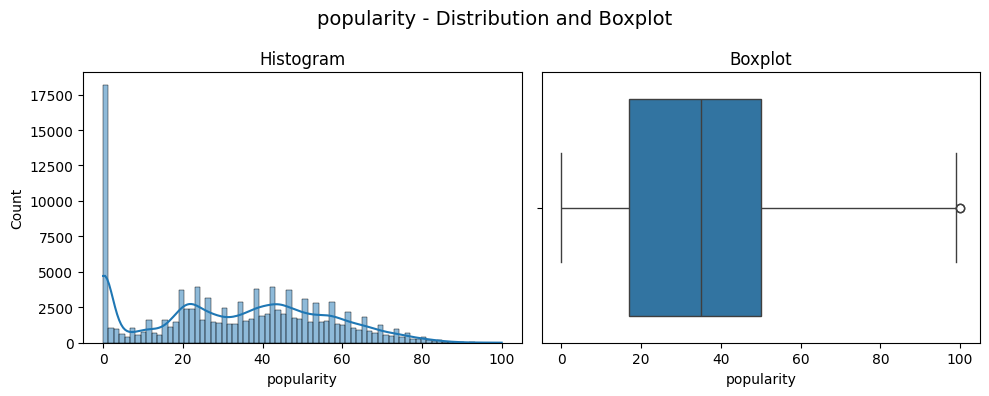

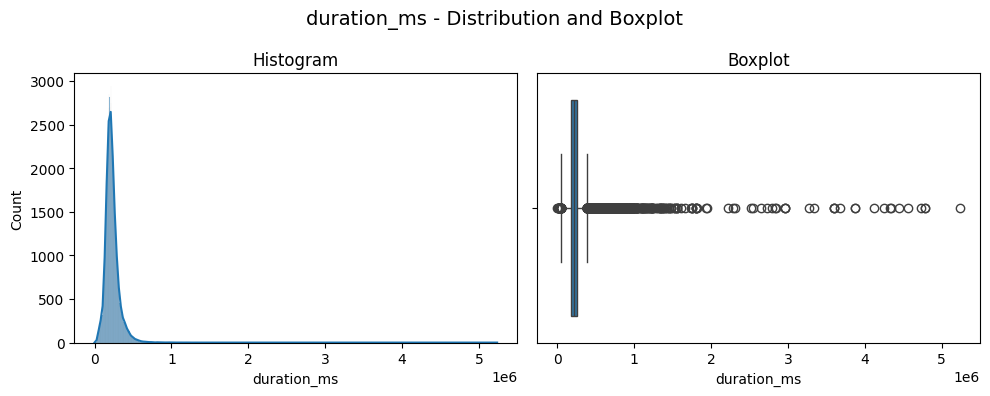

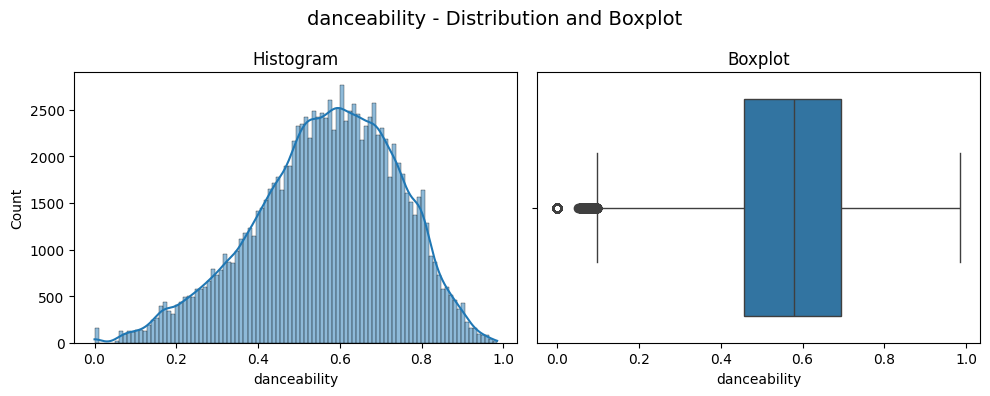

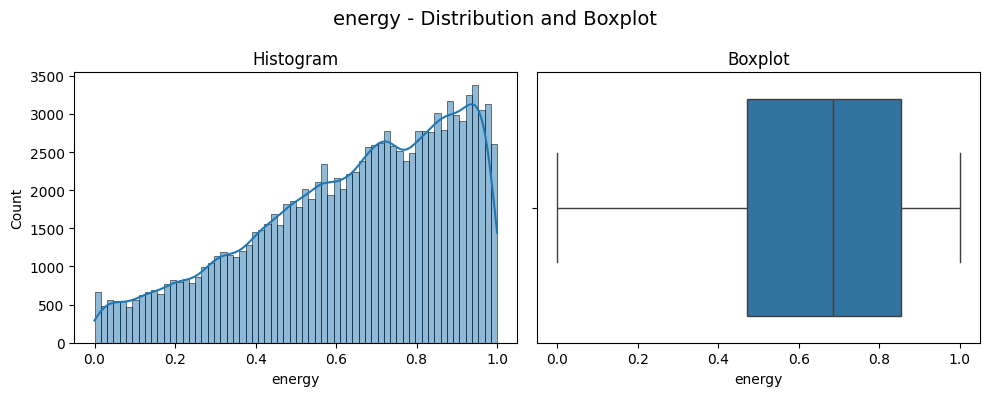

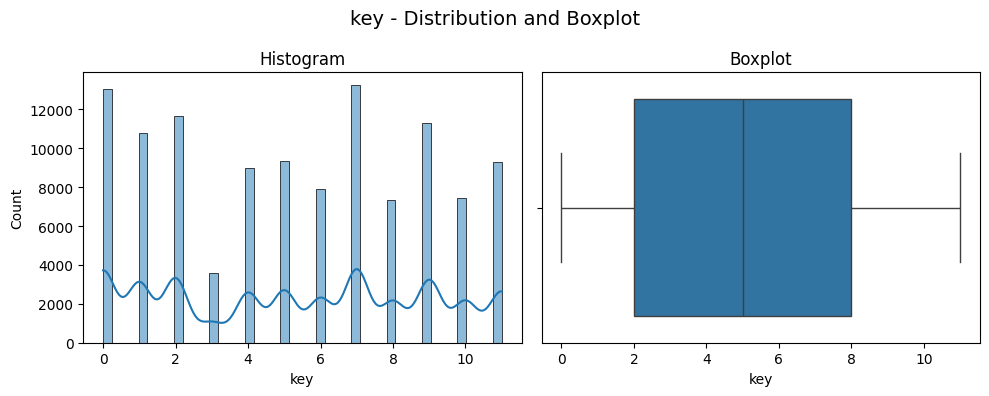

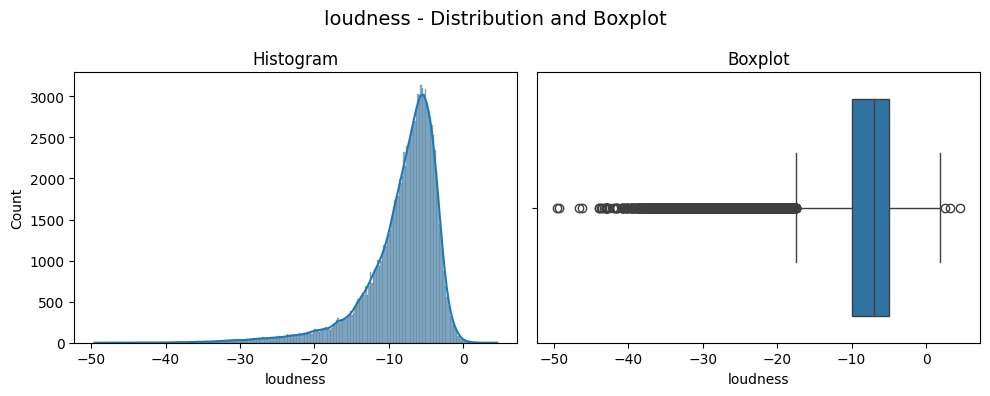

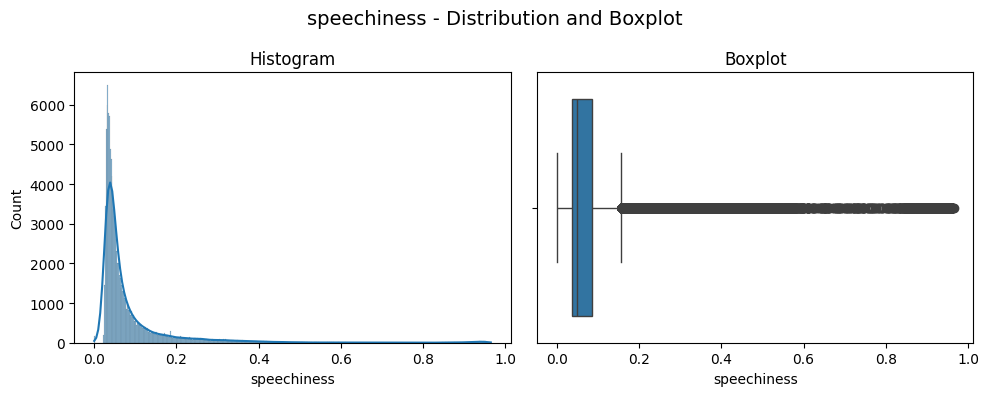

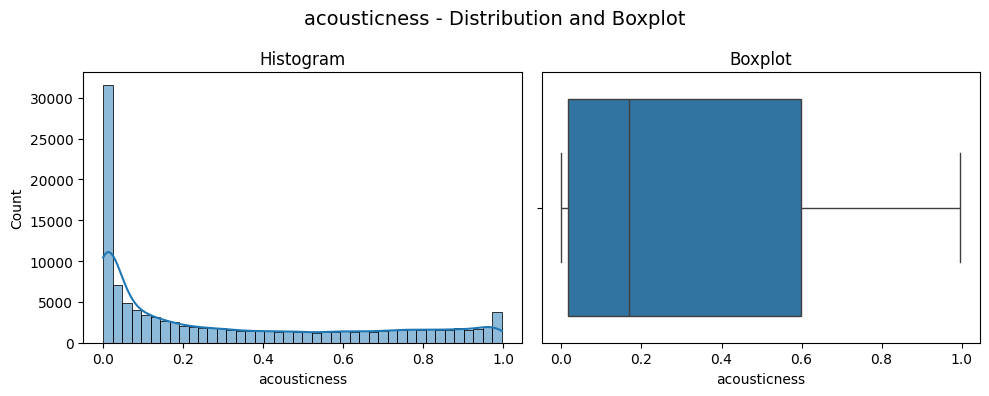

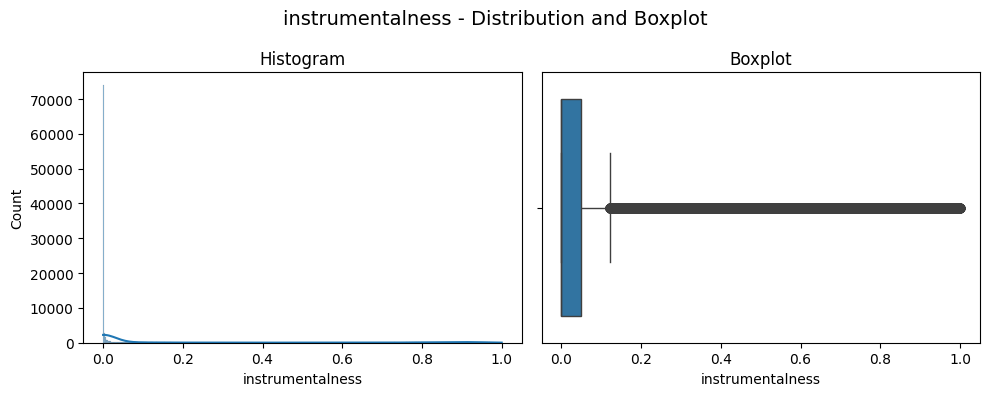

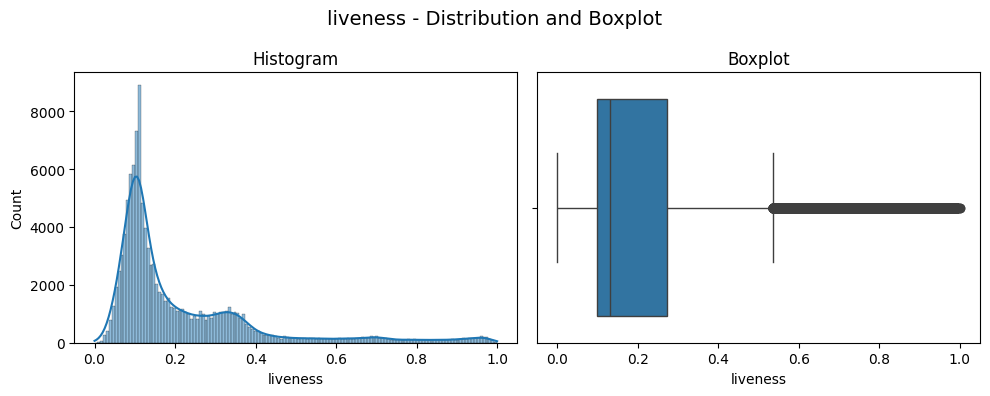

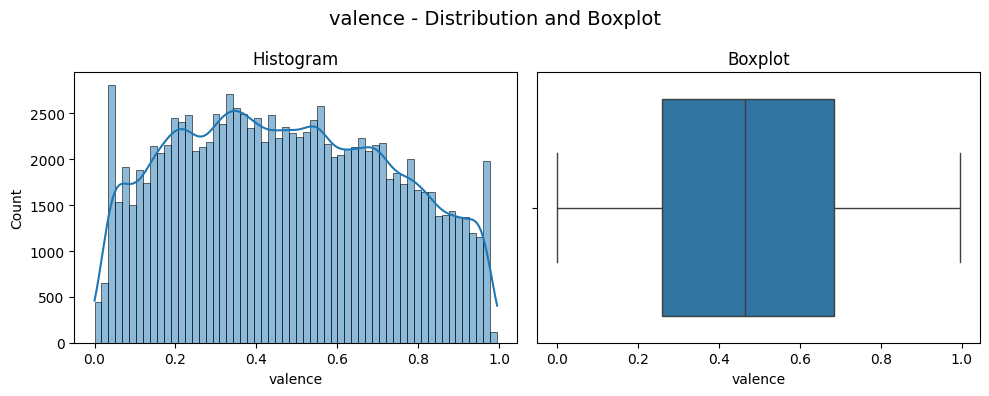

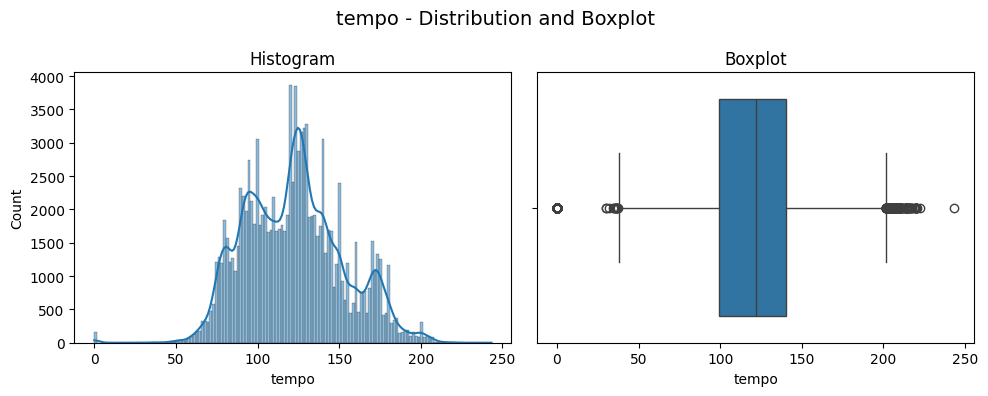

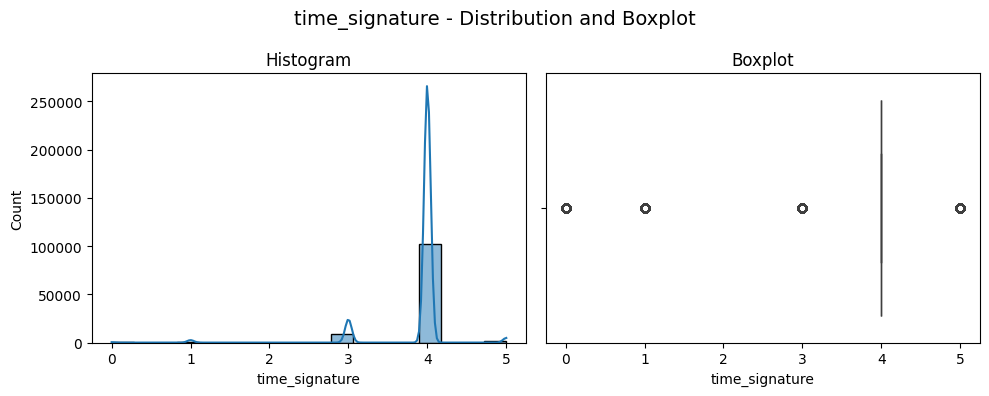

In [ ]:
for col in spotifyCont_df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(f'{col} - Distribution and Boxplot', fontsize=14)

    # Histogram
    sns.histplot(spotifyCont_df[col].dropna(), kde=True, ax=axes[0])
    axes[0].set_title('Histogram')
    axes[0].set_xlabel(col)

    # Boxplot
    sns.boxplot(x=spotifyCont_df[col], ax=axes[1])
    axes[1].set_title('Boxplot')
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

In [17]:
spotify_df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

Isolating top 80% of songs. That way only actually 'popular' ones are in the data.

In [23]:
spotifyPopular_df = spotify_df[spotify_df['popularity'] > 20]
spotifyPopular_df

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [27]:
# USING CHANGE KEY COLUMN.

spotifyPopular_df['key_name'] = spotifyPopular_df['key'].map({
    0: 'C',
    1: 'C♯/D♭',
    2: 'D',
    3: 'D♯/E♭',
    4: 'E',
    5: 'F',
    6: 'F♯/G♭',
    7: 'G',
    8: 'G♯/A♭',
    9: 'A',
    10: 'A♯/B♭',
    11: 'B'
})


/tmp/ipython-input-3297676830.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotifyPopular_df['key_name'] = spotifyPopular_df['key'].map({


In [31]:
spotifyPopular_df['key_name'].value_counts()

,count
key_name,
G,9303
C,9090
D,8693
A,8083
C♯/D♭,7273
E,6632
B,6517
F,6461
F♯/G♭,5462


In [32]:
spotify_contcols = ['popularity','duration_ms','danceability','energy','key',
                   'loudness','speechiness','acousticness','instrumentalness',
                   'liveness','valence','tempo','time_signature']
spotifyPopCont_df = spotifyPopular_df[spotify_contcols]

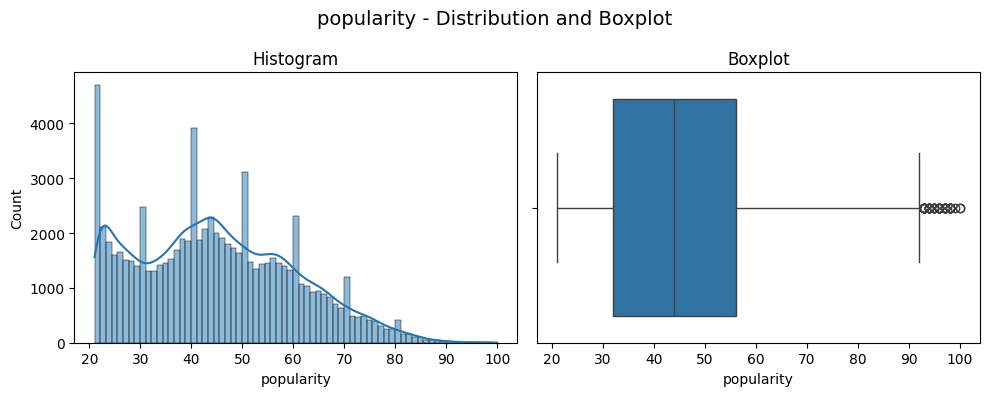

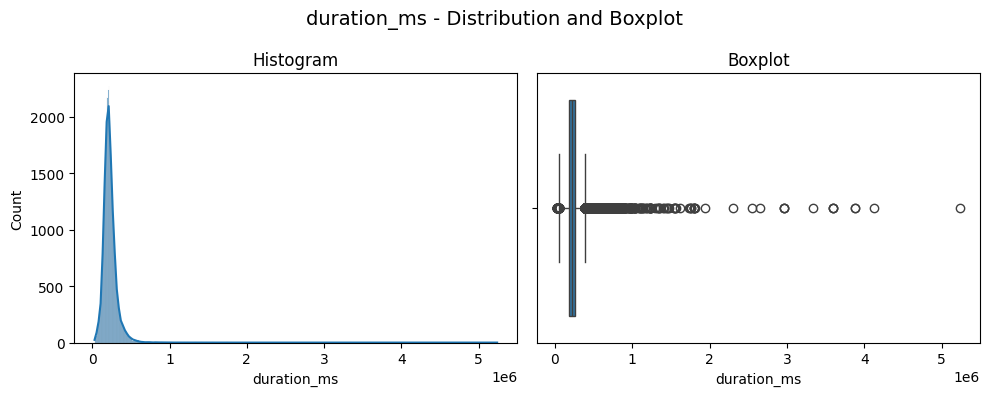

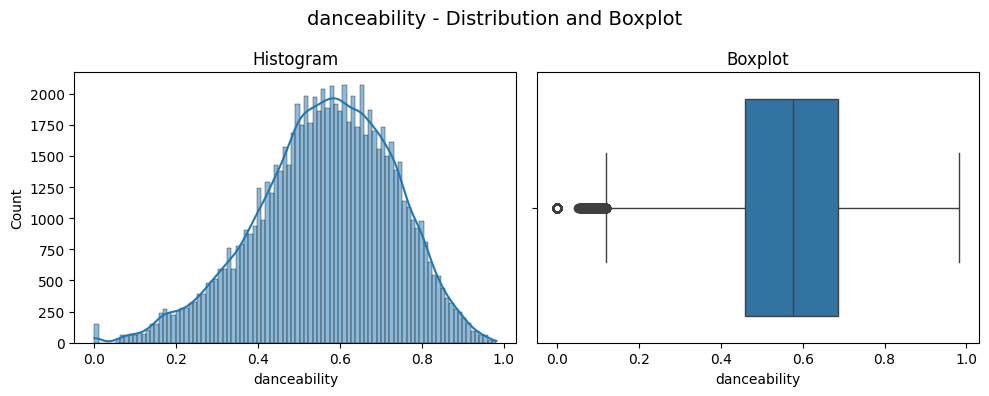

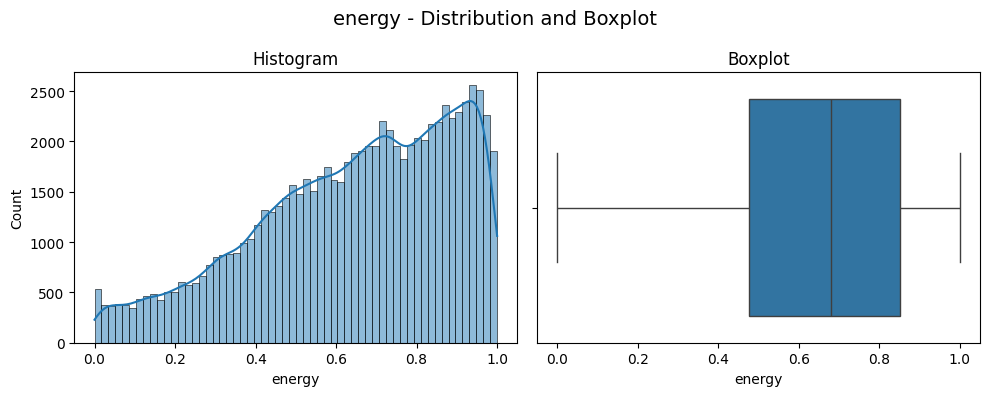

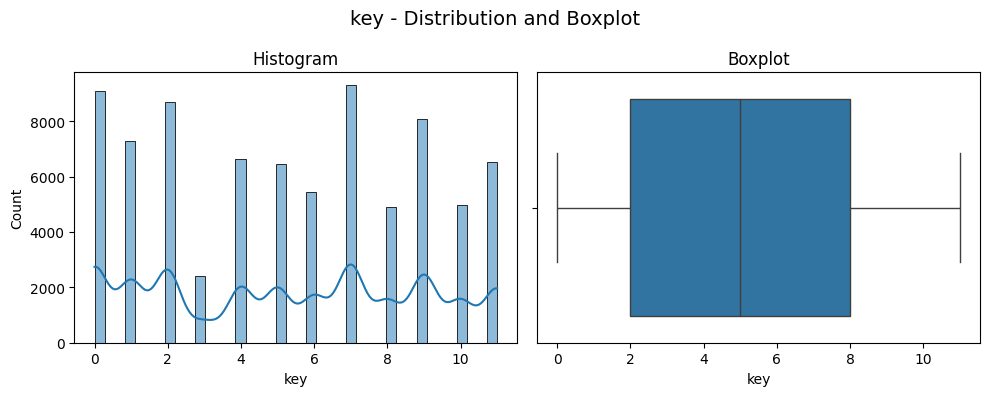

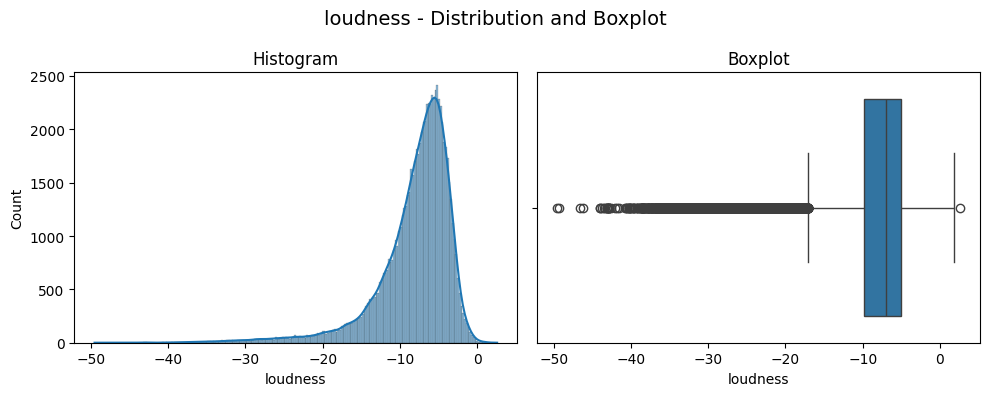

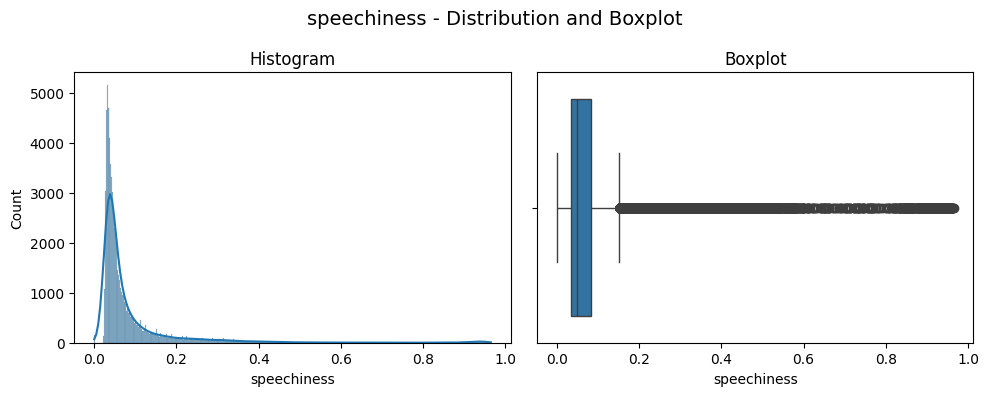

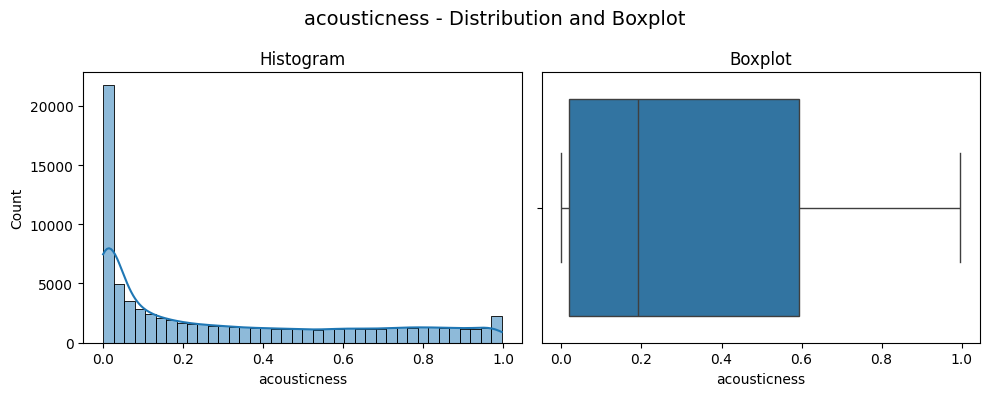

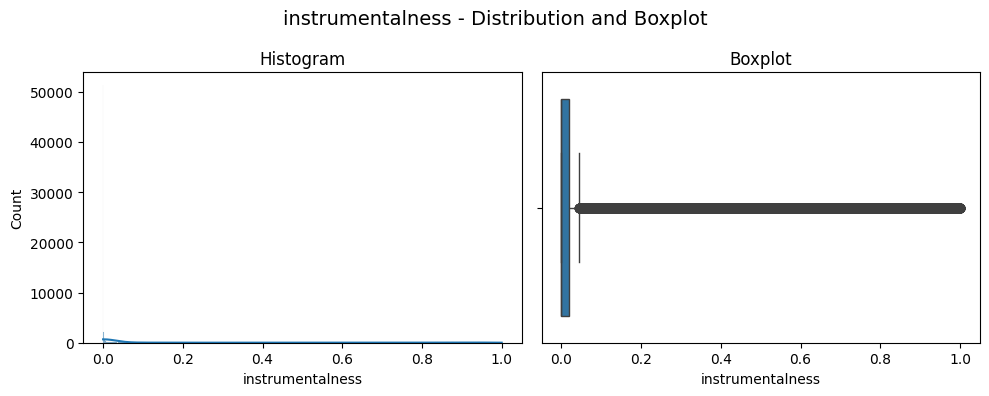

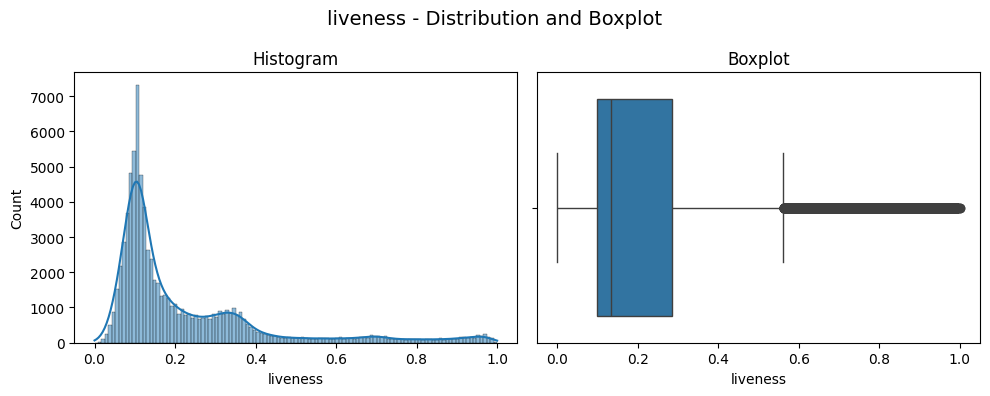

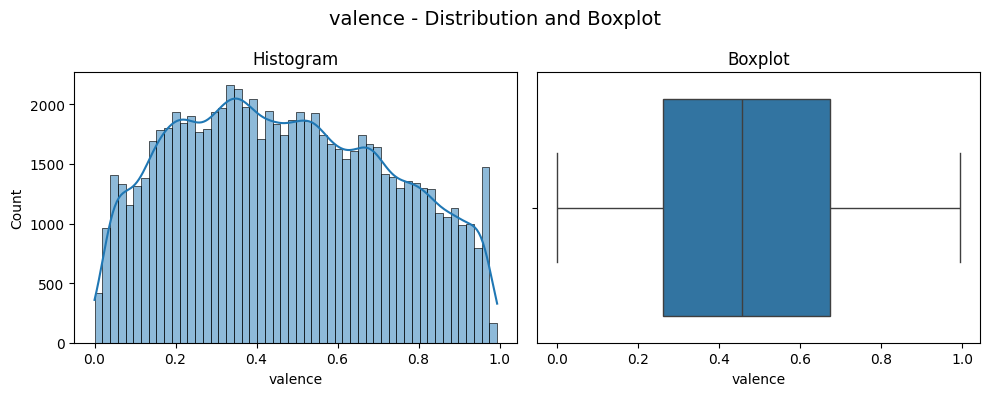

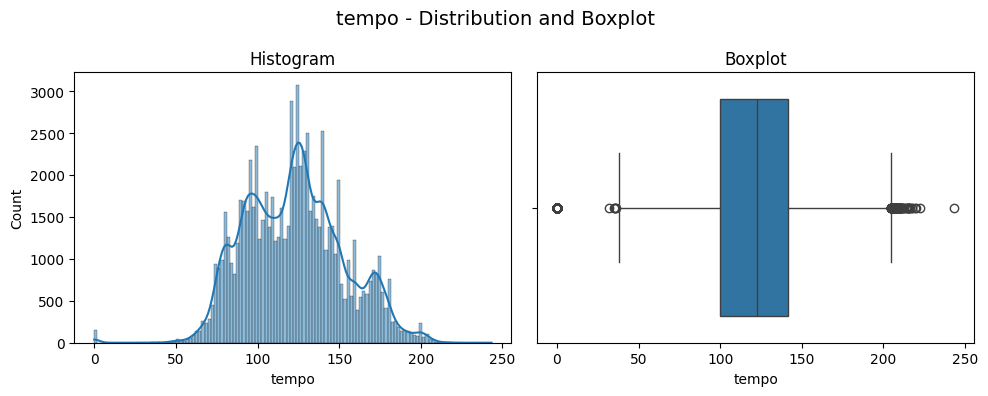

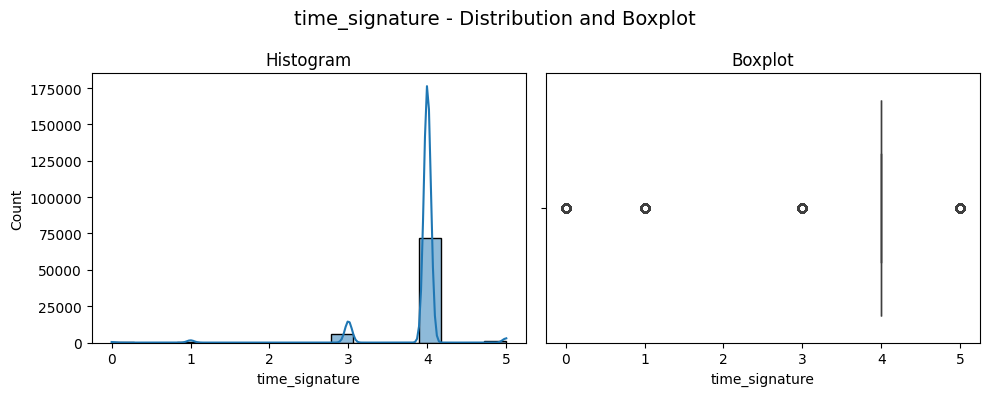

In [26]:
spotifyPopular_df.columns
for col in spotifyPopCont_df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(f'{col} - Distribution and Boxplot', fontsize=14)

    # Histogram
    sns.histplot(spotifyPopCont_df[col].dropna(), kde=True, ax=axes[0])
    axes[0].set_title('Histogram')
    axes[0].set_xlabel(col)

    # Boxplot
    sns.boxplot(x=spotifyPopCont_df[col], ax=axes[1])
    axes[1].set_title('Boxplot')
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()